# Image Processing Basics

### Read,  Display and Edit images, Plot Histograms

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage import data, io, filters, color, exposure
from skimage.transform import rotate

%matplotlib inline
#print the versions of packages 
print ('numpy version:', np.__version__)
print ('scikit-image version:', skimage.__version__)

numpy version: 1.23.5
scikit-image version: 0.19.3


## Setup

In [2]:
#Default value for color map is "jet", change to gray 
plt.rcParams["image.cmap"] = "gray"
#change default nterpolation tp nearest
plt.rcParams["image.interpolation"] = "nearest"

#reusable function to display images
def show_images(images,titles=None):
    """Display a list of images"""
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n) # Make subplot
        if image.ndim == 2: # Is image grayscale?
            plt.gray() # Only place in this blog you can't replace 'gray' with 'grey'
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

### Generate an Image

[[0.82846878 0.7759425  0.7735074  ... 0.5426872  0.86055402 0.21416826]
 [0.82437653 0.95416164 0.90968794 ... 0.73043101 0.16405191 0.99982854]
 [0.0408803  0.08705263 0.23068967 ... 0.85463607 0.66576618 0.76491188]
 ...
 [0.04836569 0.09049398 0.63169947 ... 0.66533556 0.52641908 0.68044982]
 [0.03934019 0.27347105 0.12062694 ... 0.67135298 0.86687119 0.87566889]
 [0.36169979 0.37125829 0.67909353 ... 0.47192201 0.58732243 0.21857314]]


Text(0.5, 1.0, 'Random grayscale image')

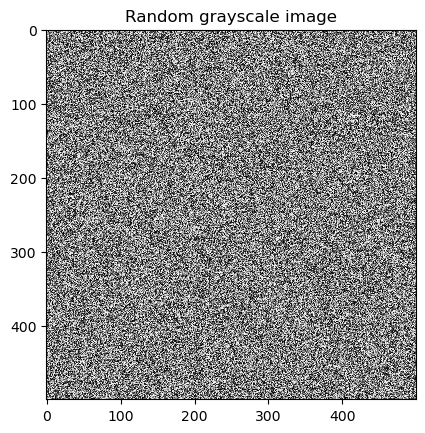

In [3]:
#A grayscale image is just a 2D array
gray_image = np.random.rand(500, 500)
print(gray_image)
from matplotlib import pyplot as plt, cm
plt.imshow(gray_image, cmap=cm.gray, interpolation='nearest')
plt.title('Random grayscale image')

In [5]:
# Create an image (10 x 10 pixels)
rgb_image = np.zeros(shape=(10,10,3),dtype=np.uint8) # <- unsigned 8 bit int

rgb_image[:,:,0] = 255 # Set red value for all pixels
rgb_image[:,:,1] = 255 # Set green value for all pixels
rgb_image[:,:,2] = 0   # Set no blue value for all pixels

print(rgb_image)

[[[255 255   0]
  [255 255   0]
  [255 255   0]
  [255 255   0]
  [255 255   0]
  [255 255   0]
  [255 255   0]
  [255 255   0]
  [255 255   0]
  [255 255   0]]

 [[255 255   0]
  [255 255   0]
  [255 255   0]
  [255 255   0]
  [255 255   0]
  [255 255   0]
  [255 255   0]
  [255 255   0]
  [255 255   0]
  [255 255   0]]

 [[255 255   0]
  [255 255   0]
  [255 255   0]
  [255 255   0]
  [255 255   0]
  [255 255   0]
  [255 255   0]
  [255 255   0]
  [255 255   0]
  [255 255   0]]

 [[255 255   0]
  [255 255   0]
  [255 255   0]
  [255 255   0]
  [255 255   0]
  [255 255   0]
  [255 255   0]
  [255 255   0]
  [255 255   0]
  [255 255   0]]

 [[255 255   0]
  [255 255   0]
  [255 255   0]
  [255 255   0]
  [255 255   0]
  [255 255   0]
  [255 255   0]
  [255 255   0]
  [255 255   0]
  [255 255   0]]

 [[255 255   0]
  [255 255   0]
  [255 255   0]
  [255 255   0]
  [255 255   0]
  [255 255   0]
  [255 255   0]
  [255 255   0]
  [255 255   0]
  [255 255   0]]

 [[255 255   0]
  [255 255  

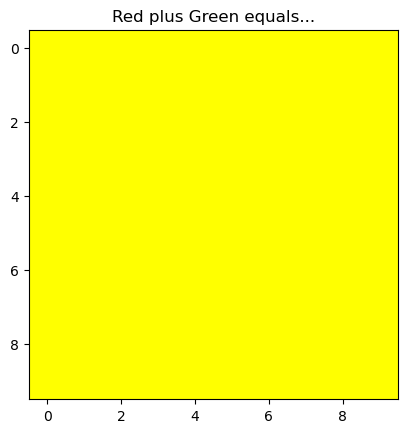

In [6]:
plt.title('Red plus Green equals...')
plt.imshow(rgb_image)
plt.show()

### Exercise

Try some other color combinations

### Display Images

(numpy.ndarray, dtype('uint8'), (512, 512))

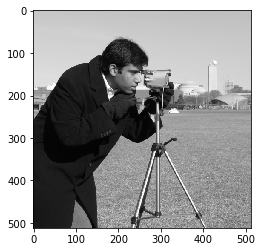

In [15]:
#use an existing image from the scikit dataset
camera = data.camera()

#display the image through a plot
plt.imshow(camera)

#print out type and shape of the image
type(camera), camera.dtype, camera.shape, 

(numpy.ndarray, dtype('uint8'), (300, 451, 3))

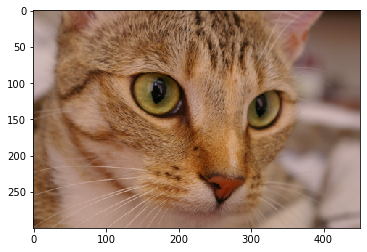

In [16]:
#use an existing image from the scikit dataset
chelsea = data.chelsea()

#display the image through a plot
plt.imshow(chelsea)

#print out type and shape of the image
type(chelsea), chelsea.dtype, chelsea.shape, 

### Image Statistics

In [17]:
#statistical info
print(camera.min(), camera.max(), camera.mean())
print(chelsea.min(), chelsea.max(), chelsea.mean())

0 255 129.06072616577148
0 231 115.30514166050752


In [18]:
# Get the value of the pixel on the 200th row and 20th column

#single intensity value for gray scale
print ("Value of pixel(200,20) for Camera", camera[200, 20])

#RGB intensity values for color
print ("Value of pixel(200,20) for Chelsea", chelsea[200, 20])

Value of pixel(200,20) for Camera 158
Value of pixel(200,20) for Chelsea [133  97  73]


### Histograms

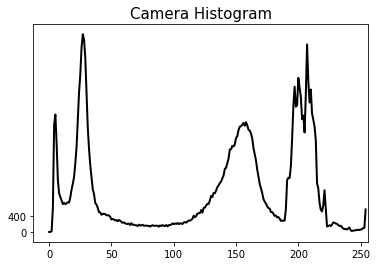

In [19]:
#plot histogram of intensities manually
values, bins = np.histogram(camera,bins=np.arange(256))
fig, ax1 = plt.subplots(figsize=(6, 4))
ax1.plot(bins[:-1], values, lw=2, c='k')
ax1.set_xlim(right=256)
ax1.set_yticks([0, 400])
ax1.set_title('Camera Histogram', fontsize=15)
plt.show()

Text(0.5, 1.0, 'Camera Histogram')

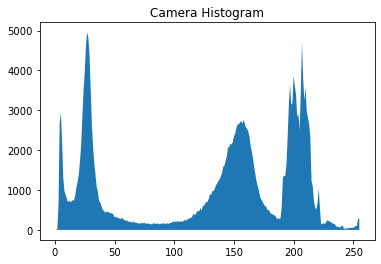

In [20]:
#plot histogram of intensities using Skimage API
hist, bin_centers = exposure.histogram(camera)
plt.fill_between(bin_centers, hist)
plt.title("Camera Histogram")

For color pictures, we will plot a histogram for each color channel in a single plot. Instead of using `plt.hist`, use `plt.plot` or `plt.fill_between` in combination with `histogram` from `skimage.exposure`.

Text(0.5, 1.0, 'Chelsea Histogram')

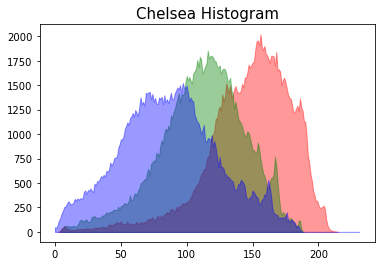

In [21]:
for col, channel in zip('rgb', np.rollaxis(chelsea, axis=-1)):
    hist, bin_centers = exposure.histogram(channel)
    plt.fill_between(bin_centers, hist, color=col, alpha=0.4)
plt.title('Chelsea Histogram', fontsize=15)

## Process Image

In [22]:
# Set to black the pixel on the 3rd row and 10th column
camera[3, 10] = 0

### Slicing

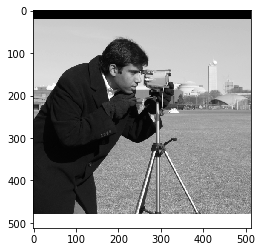

In [23]:
# Set to black the top 20 lines
camera[:20] = 0
# Set to white the bottom 40 lines
camera[480:520] = 255
plt.imshow(camera)

### Masking

**Indexing with masks of booleans**

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


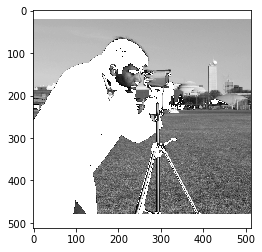

In [24]:
mask = camera < 80
print(mask)
# Set to "white" (255) pixels where mask is True
camera[mask] = 255
plt.imshow(camera)

**Indexing with sets of indices**

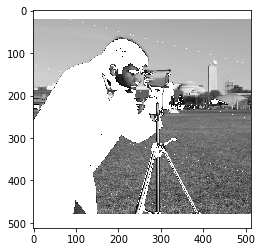

In [25]:
#draw lines 
inds_r = np.arange(len(camera))
inds_c = 4 * inds_r % len(camera)
camera[inds_r, inds_c] = 255
plt.imshow(camera)

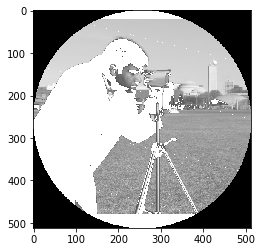

In [26]:
nrows, ncols = camera.shape
row, col = np.ogrid[:nrows, :ncols]
cnt_row, cnt_col = nrows / 2, ncols / 2
outer_disk_mask = ((row - cnt_row)**2 + (col - cnt_col)**2 > (nrows / 2)**2)
camera[outer_disk_mask] = 0
plt.imshow(camera)

## Basic Color Image Processing

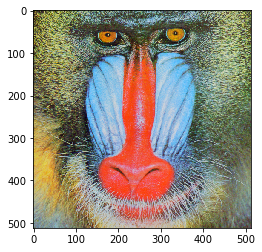

In [27]:
#read image from disk
filename = 'images/mandrill.png'
mandrill = io.imread(filename)
plt.imshow(mandrill)

In [28]:
type(mandrill), mandrill.shape

(numpy.ndarray, (512, 512, 3))

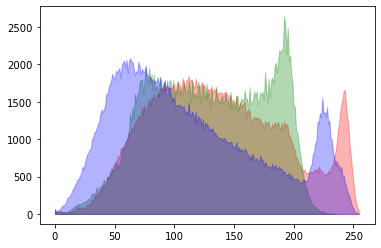

In [29]:
#plot histogram
for col, channel in zip('rgb', np.rollaxis(mandrill, axis=-1)):
    hist, bin_centers = exposure.histogram(channel)
    plt.fill_between(bin_centers, hist, color=col, alpha=0.3)

NumPy indexing makes separating out each color layer of an image easy. The slicing operator ':' can be used to access all values of a specified dimension while a tuple is used to requests a subset. In order to view a particular color in isolation, we an set the other two values to 0 with these conventions.

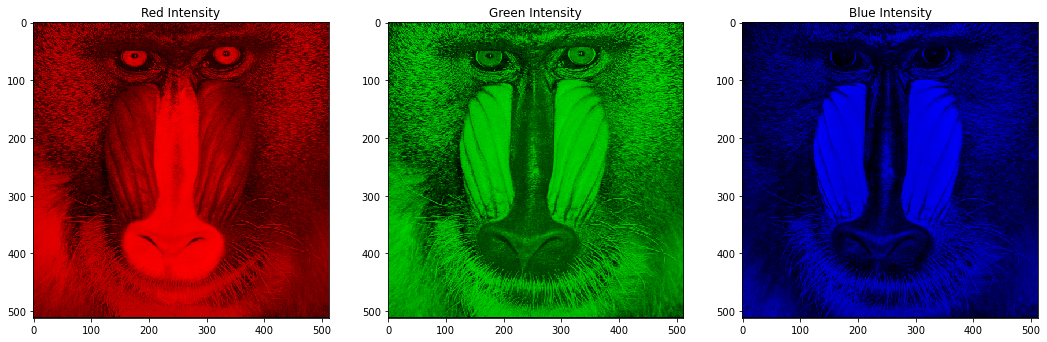

Note: lighter areas correspond to higher intensities



In [30]:
red, green, blue = mandrill.copy(), mandrill.copy(), mandrill.copy()
red[:,:,(1,2)] = 0
green[:,:,(0,2)] = 0
blue[:,:,(0,1)] = 0

show_images(images=[red, green, blue], titles=['Red Intensity', 'Green Intensity', 'Blue Intensity'])
print ('Note: lighter areas correspond to higher intensities\n')

In [ ]:
#Method 2
red_image = np.zeros_like(mandrill)
green_image = np.zeros_like(mandrill)
blue_image = np.zeros_like(mandrill)

red_image[:, :, 0] = mandrill[:, :, 0]
green_image[:, :, 1] = mandrill[:, :, 1]
blue_image[:, :, 2] = mandrill[:, :, 2]
#show_images(images=[red_image, green_image, blue_image], titles=['Red Intensity', 'Green Intensity', 'Blue Intensity'])

### Color image to Gray scale

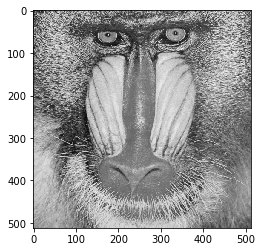

In [31]:
#convert image to grey scale and display
mandrill_gray = color.rgb2gray(mandrill)
plt.imshow(mandrill_gray)

Text(0.5, 1.0, 'Mandrill Histogram')

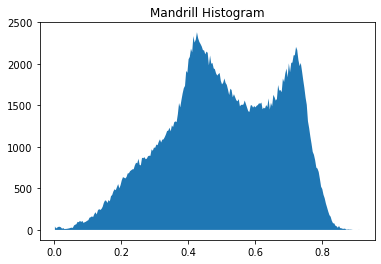

In [32]:
#plot histogram of intensities using Skimage API
hist, bin_centers = exposure.histogram(mandrill_gray)
plt.fill_between(bin_centers, hist)
plt.title("Mandrill Histogram")

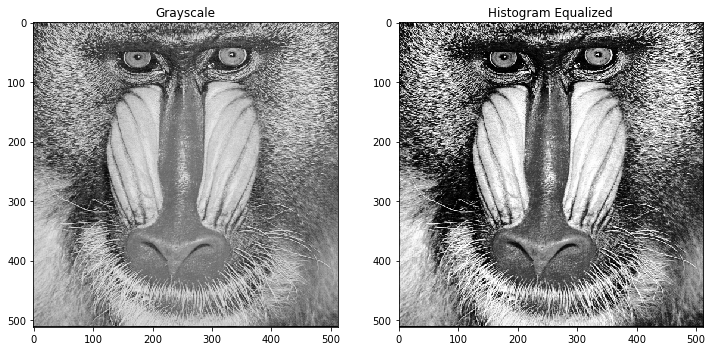

In [33]:
from skimage.exposure import equalize_hist

mandrill_equalized = equalize_hist(mandrill_gray)

show_images(images=[mandrill_gray,mandrill_equalized],
            titles=["Grayscale","Histogram Equalized"])

Text(0.5, 1.0, 'Mandrill Equalized')

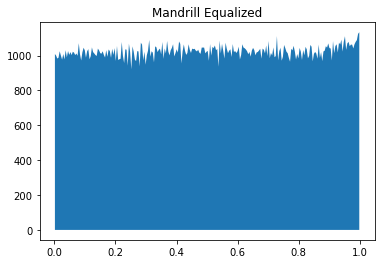

In [34]:
#plot histogram of intensities using Skimage API
hist, bin_centers = exposure.histogram(mandrill_equalized)
plt.fill_between(bin_centers, hist)
plt.title("Mandrill Equalized")

### Excercise

1) Add two red patches under each eye of the mandrill under its eyes
Hint: In a color image the pixel values should be [R,G,B] 

2) Plot the color histogram again. What difference do you observe ?